<a href="https://colab.research.google.com/github/SajalSinha/Sales_Prediction_Supervised-ML/blob/main/Rossmann_Sales_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Capstone Project 2/Retail Sales Prediction/Data & Resources/store.csv')

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/Capstone Project 2/Retail Sales Prediction/Data & Resources/Rossmann Stores Data.csv')

In [ ]:
df_3 = pd.read_csv('/content/drive/MyDrive/Capstone Project 2/df_3.csv')

In [ ]:
df_1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df_1.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
df_2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df_2.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2013-09-07,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
df_3.head()

,Store,total sales of stores,total Customers,total working days
0,1,3716854,440523,781
1,2,3883858,457855,784
2,3,5408261,584310,779
3,4,7556507,1036254,784
4,5,3642818,418588,779


In [ ]:
df_3.describe(include='all')

,Store,total sales of stores,total Customers,total working days
count,1115.00000,1.115000e+03,1.115000e+03,1115.000000
mean,558.00000,5.267427e+06,5.776159e+05,757.302242
std,322.01708,1.951304e+06,3.046545e+05,63.861126
min,1.00000,2.114322e+06,1.875830e+05,592.000000
25%,279.50000,3.949377e+06,4.053910e+05,776.000000
50%,558.00000,4.990259e+06,5.092330e+05,779.000000
75%,836.50000,6.084148e+06,6.715440e+05,782.000000
max,1115.00000,1.951684e+07,3.206058e+06,942.000000


# Cleaning and Analyzing of df_2
Our main objective is to get total sales of each store from 1 Jan 2013 to 31 July 2015 in total, which weill reduce the rows to total number of stores(1115)

In [ ]:
# for i in range(1,len(df_2['Store'])):
#   total_sales_dict = {}
#   total_sales_dict[df_2['Store'][i]] = df_2.loc[df_2['Store']==df_2['Store'][i],'Sales'].sum()
# a =set(df_2['Store'])
# stores_list = list(a)
# for i in range(1,len(df_2['Store'])):
#   for ele in stores_list:
#     total_sales_dict = {}
#     total_sales_dict[df_2['Store'][i]] = df_2.loc[df_2['Store']== ele,'Sales'].sum()

###Checking of Null Values

In [ ]:
df_2.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

###Checking of Outliers

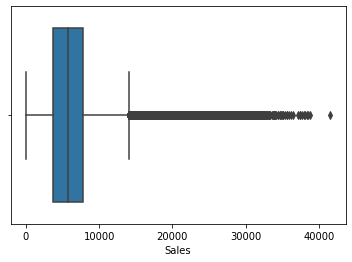

In [ ]:
col_list = list(df_2.columns)
sns.boxplot(x=df_2['Sales'],orient='v')

In [ ]:
df_2.loc[df_2['Sales']>=16000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
124,125,5,2015-07-31,18227,2041,1,1,0,1
191,192,5,2015-07-31,16191,1027,1,1,0,0
210,211,5,2015-07-31,17286,1659,1,1,0,1
250,251,5,2015-07-31,22205,2508,1,1,0,1
261,262,5,2015-07-31,25774,3669,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1015767,788,3,2013-01-02,17934,1791,1,0,0,1
1015796,817,3,2013-01-02,25357,3462,1,0,0,1
1015821,842,3,2013-01-02,20355,1257,1,0,0,1
1016093,1114,3,2013-01-02,20642,3401,1,0,0,1


In [ ]:
df_2.loc[df_2['Sales']>=30000,['SchoolHoliday','StateHoliday']]

,SchoolHoliday,StateHoliday
5836,0,0
13641,0,0
21446,0,0
29251,0,0
43278,0,0
...,...,...
965364,0,0
966479,0,0
979001,1,0
994611,0,0


In [ ]:
df_2.loc[df_2['Promo']==1,'Sales'].mean()

7991.152045969903

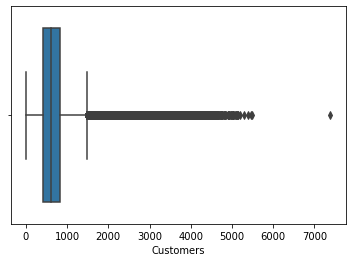

In [ ]:
sns.boxplot(x=df_2['Customers'],orient='v')

In [ ]:
df_2.loc[df_2['Customers']>=6000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,2013-01-22,27190,7388,1,1,0,0


In [ ]:
df_2.loc[df_2['StateHoliday']==1,'Promo']

Series([], Name: Promo, dtype: int64)

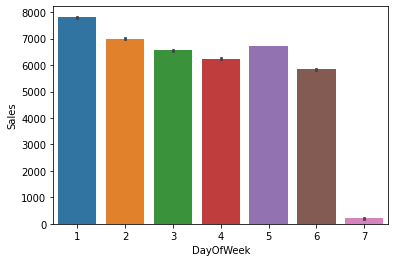

In [ ]:
sns.barplot(y='Sales',x='DayOfWeek',data=df_2)

##EDA

In [ ]:
numeric_feature = df_2.describe().columns
numeric_feature

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday'],
      dtype='object')

In [ ]:
 df_2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


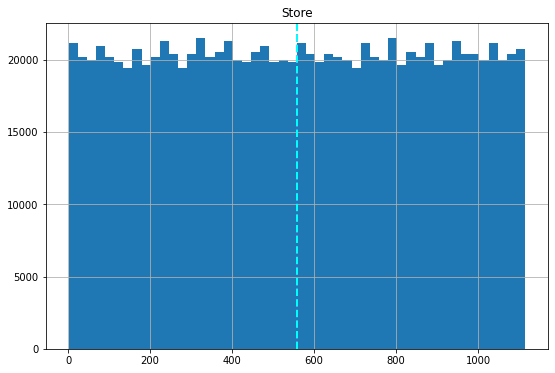

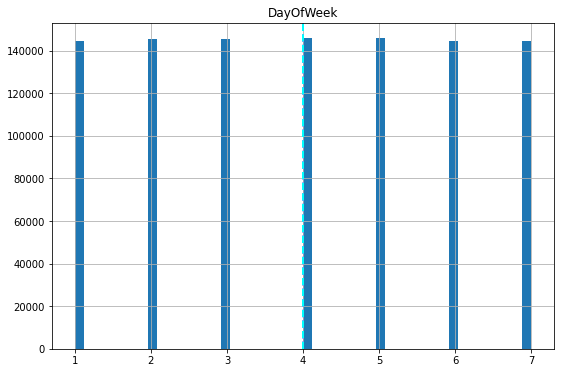

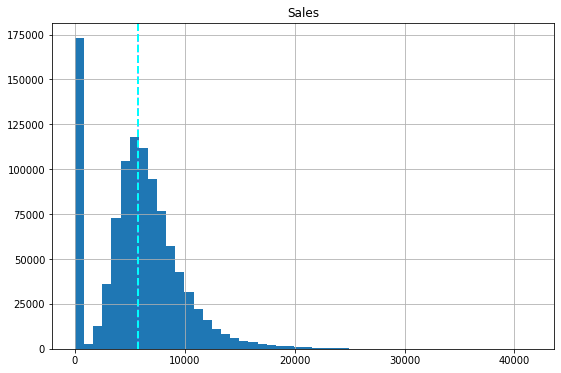

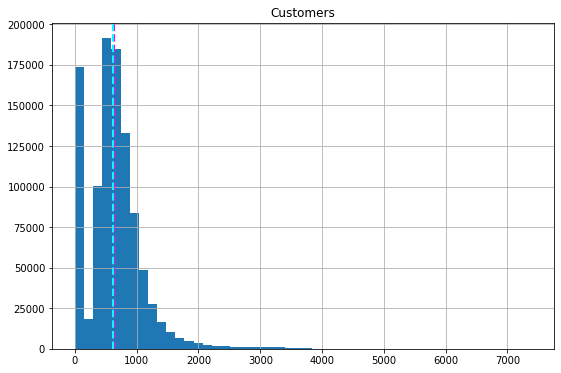

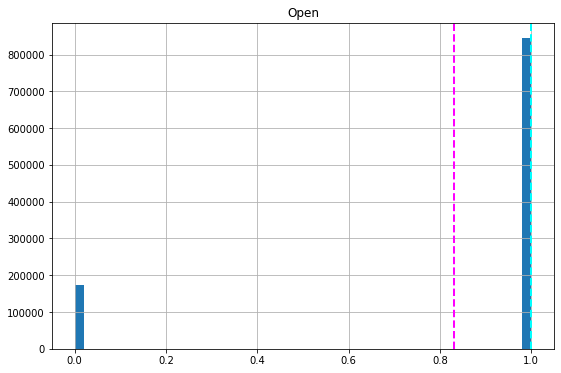

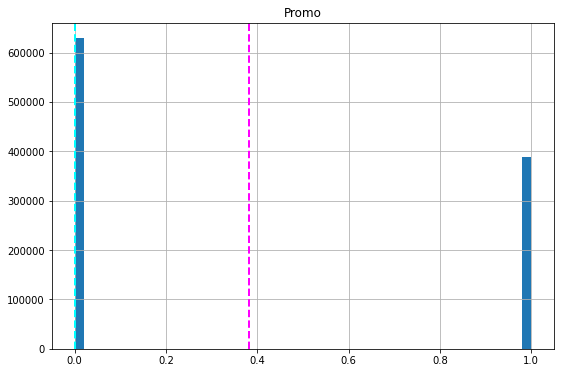

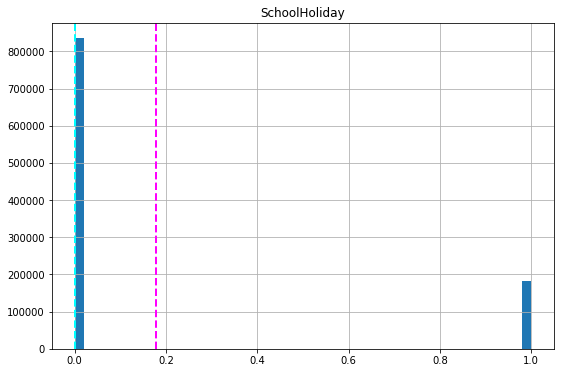

In [ ]:
for col in numeric_feature[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_2[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

<Figure size 720x720 with 0 Axes>

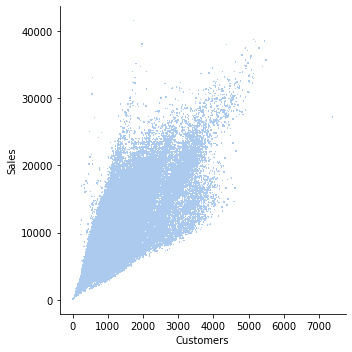

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(x=df_2['Customers'],y=df_2['Sales'])

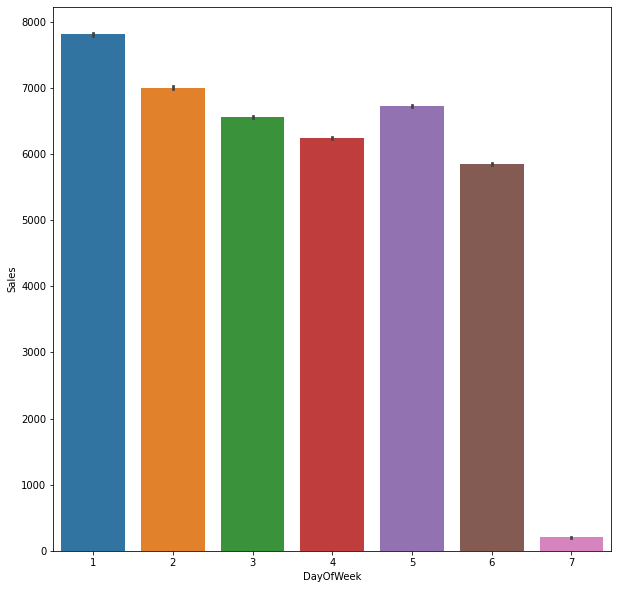

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_2['DayOfWeek'],y=df_2['Sales'])

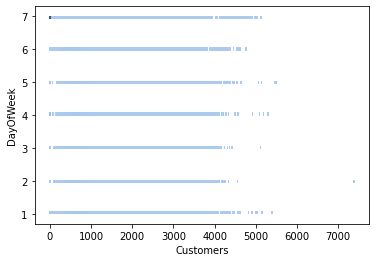

In [ ]:
sns.histplot(y=df_2['DayOfWeek'],x=df_2['Customers'])

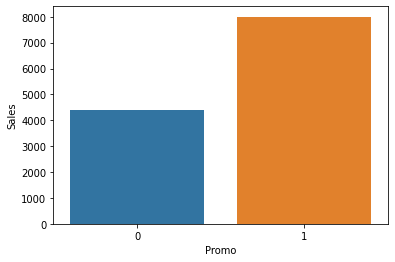

In [ ]:
sns.barplot(x=df_2['Promo'],y=df_2['Sales'])

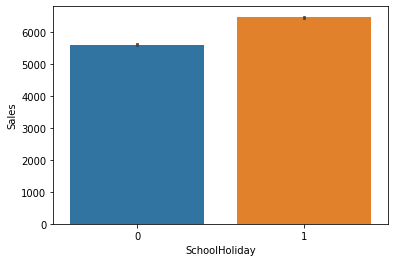

In [ ]:
sns.barplot(x=df_2['SchoolHoliday'],y=df_2['Sales'])

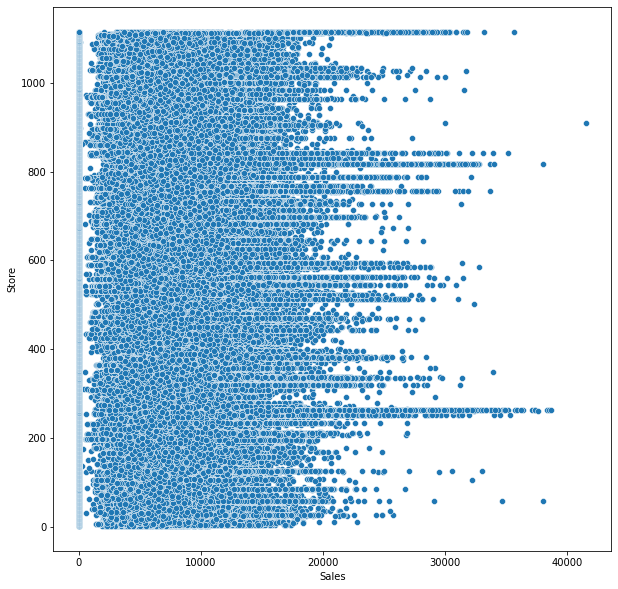

In [ ]:
fig_dims = (10,10)

fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y=df_2['Store'],x=df_2['Sales'], ax = ax)

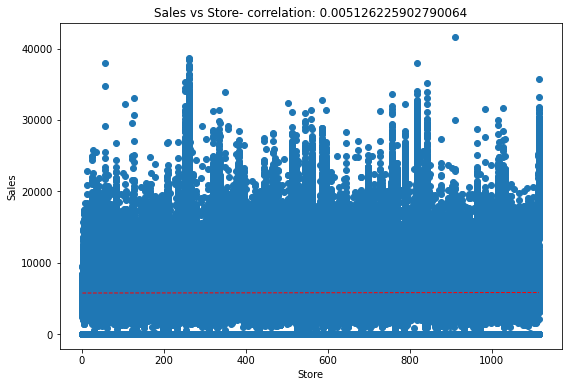

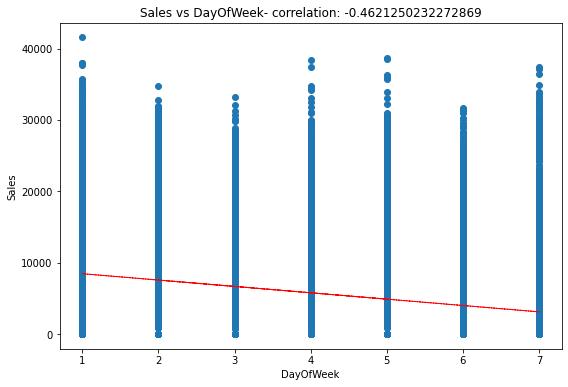

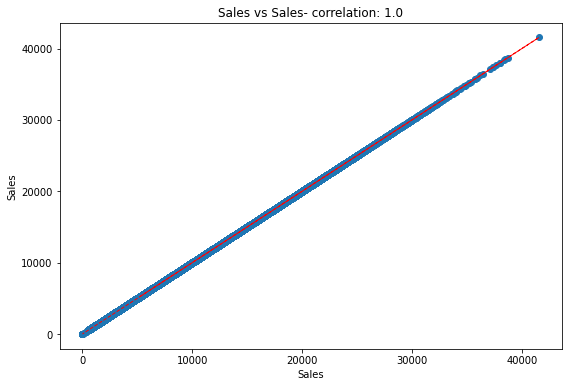

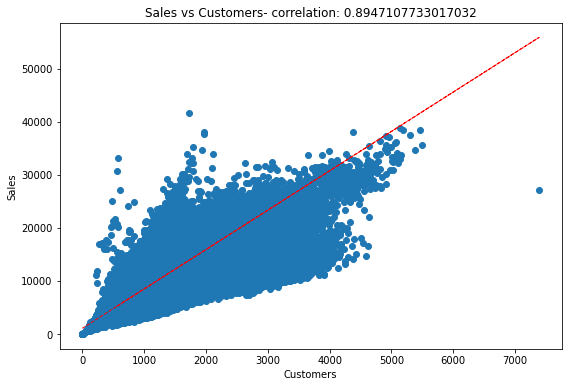

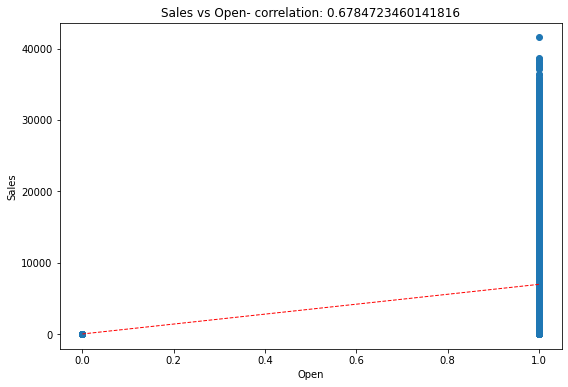

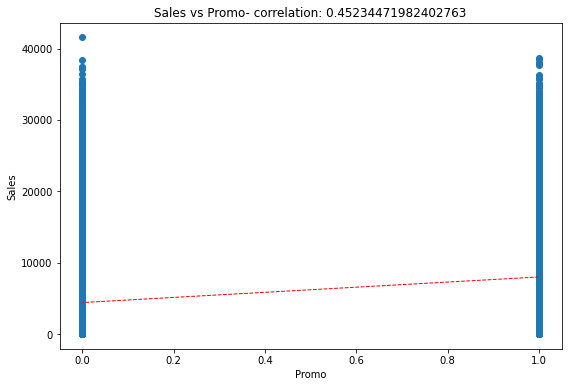

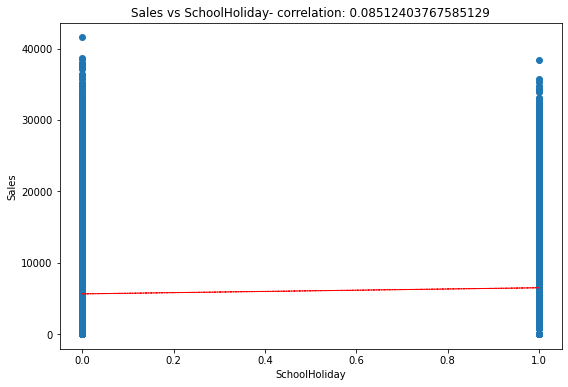

In [ ]:
for col in list(numeric_feature[:]):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_2[col]
    label = df_2['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_2[col], df_2['Sales'], 1)
    y_hat = np.poly1d(z)(df_2[col])

    plt.plot(df_2[col], y_hat, "r--", lw=1)

plt.show()

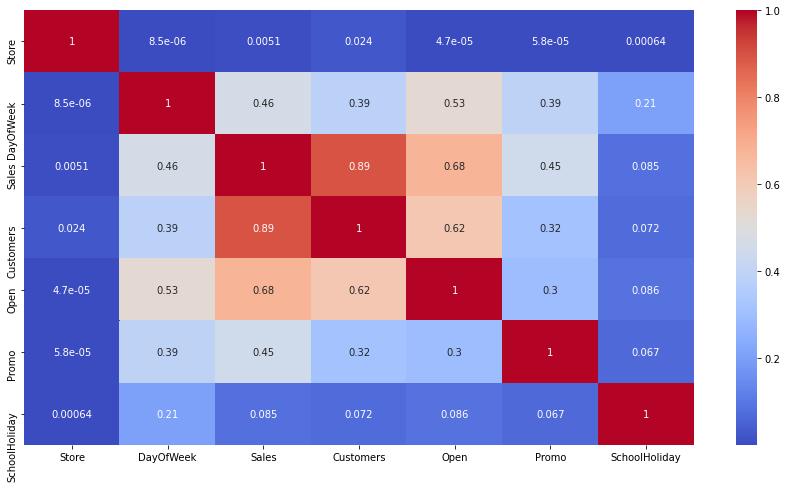

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df_2.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
a =set(df_2['Store'])
stores_list = list(a)
for i in range(1,len(df_2['Store'])):
  for ele in stores_list:
    total_sales_dict = {}
    total_sales_dict[df_2['Store'][i]] = df_2.loc[df_2['Store']== ele,'Sales'].sum()

KeyboardInterrupt: ignored

In [ ]:
total_sales_dict

##Conclusion derived from above analysis:
1) Sales and Customer col showed some high values(outliers), and major cause behiend those are promos, and a public holiday (+/- 1 month).

2) Sales rises on week days, specially Day 1(monday) due to fact that most people go out or have parties on sundays which may have it effect afterwards.

3) School holiday or Public Holiday don't have their impact on sales on that exact day, but have aftereffects.

4) Sales have reaches a great height ONLY WHEN PROMOS ARE ON.

#Cleaning and Analyzing df_1

### Check for Null Values

In [ ]:
df_1.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
df_1 = df_1.fillna(0)

In [ ]:
df_1.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
df_1.shape

(1115, 10)

##Joining of df_1 and df_3

In [ ]:
df = pd.merge(df_1,df_3,on='Store')

In [ ]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,total sales of stores,total Customers,total working days
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3716854,440523,781
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",3883858,457855,784
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5408261,584310,779
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,7556507,1036254,784
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,3642818,418588,779


## Check for Outliers for df_1

In [ ]:
df_1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
df_1.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.0
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,4.0
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,544.0
mean,558.00000,NaN,NaN,5390.358744,4.930942,1370.939013,0.512108,12.083408,1030.239462,NaN
std,322.01708,NaN,NaN,7657.973705,4.284924,935.467654,0.500078,15.542241,1006.038782,NaN
min,1.00000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,279.50000,NaN,NaN,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,558.00000,NaN,NaN,2320.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000,NaN
75%,836.50000,NaN,NaN,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000,NaN


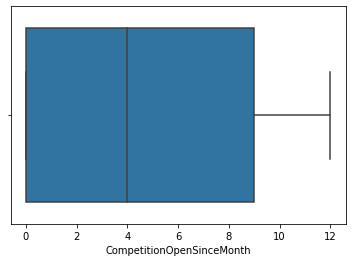

In [ ]:
sns.boxplot(x=df_1['CompetitionOpenSinceMonth'])

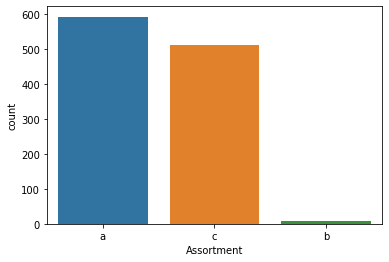

In [ ]:
sns.countplot(x=df_1['Assortment'])

In [ ]:
df_1['Promo2SinceYear'].unique()

array([   0., 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

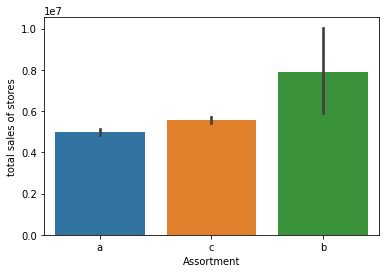

In [ ]:
sns.barplot(x=df['Assortment'],y=df['total sales of stores'])

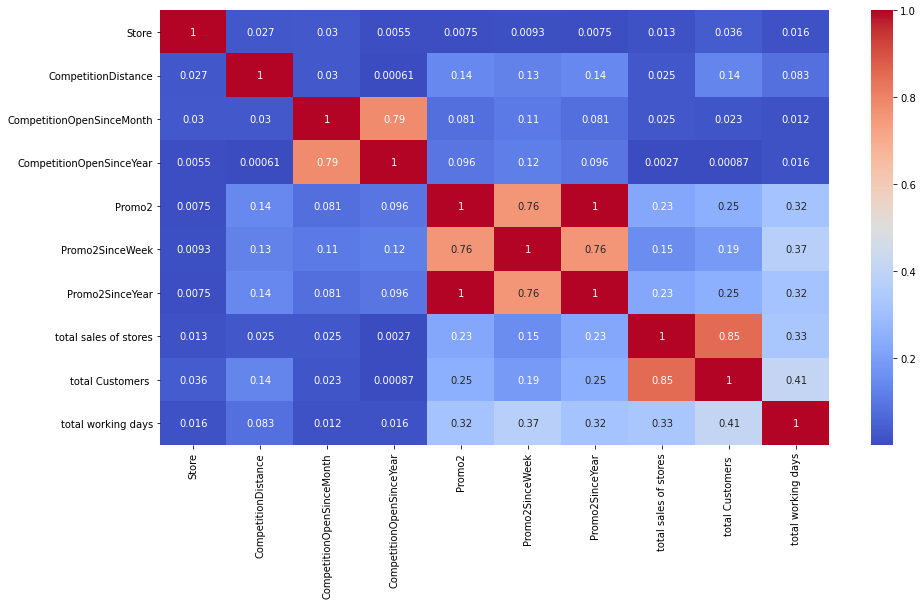

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

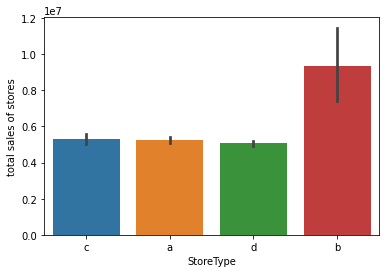

In [ ]:
sns.barplot(x=df['StoreType'],y=df['total sales of stores'])

In [ ]:
df['promo_month'] = df['Promo2SinceWeek']//4
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,total sales of stores,total Customers,total working days,promo_month
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3716854,440523,781,0.0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",3883858,457855,784,3.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5408261,584310,779,3.0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,7556507,1036254,784,0.0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,3642818,418588,779,0.0


In [ ]:
encoders_nums = {"Assortment":{"b":1,"a":0,'c':0}, "StoreType":{"b":1,"a":0,'c':0,'d':0}}
dataset = df.copy()
dataset = dataset.replace(encoders_nums)
dataset = dataset.drop(['PromoInterval'],axis=1)
dataset.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,total sales of stores,total Customers,total working days,promo_month
0,1,0,0,1270.0,9.0,2008.0,0,0.0,0.0,3716854,440523,781,0.0
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,3883858,457855,784,3.0
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,5408261,584310,779,3.0
3,4,0,0,620.0,9.0,2009.0,0,0.0,0.0,7556507,1036254,784,0.0
4,5,0,0,29910.0,4.0,2015.0,0,0.0,0.0,3642818,418588,779,0.0


In [ ]:
dataset["Promotime"] = dataset["promo_month"] + dataset["Promo2SinceYear"] 
dataset

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,total sales of stores,total Customers,total working days,promo_month,Promotime
0,1,0,0,1270.0,9.0,2008.0,0,0.0,0.0,3716854,440523,781,0.0,0.0
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,3883858,457855,784,3.0,2013.0
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,5408261,584310,779,3.0,2014.0
3,4,0,0,620.0,9.0,2009.0,0,0.0,0.0,7556507,1036254,784,0.0,0.0
4,5,0,0,29910.0,4.0,2015.0,0,0.0,0.0,3642818,418588,779,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,4091076,351883,779,7.0,2020.0
1111,1112,0,0,1880.0,4.0,2006.0,0,0.0,0.0,7974294,653276,779,0.0,0.0
1112,1113,0,0,9260.0,0.0,0.0,0,0.0,0.0,5196242,562151,784,0.0,0.0
1113,1114,0,0,870.0,0.0,0.0,0,0.0,0.0,16202585,2509542,784,0.0,0.0


##EDA for df

In [ ]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,total sales of stores,total Customers,total working days,promo_month
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3716854,440523,781,0.0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",3883858,457855,784,3.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5408261,584310,779,3.0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,7556507,1036254,784,0.0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,3642818,418588,779,0.0


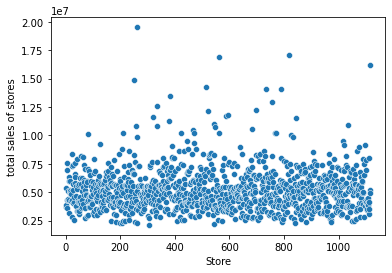

In [ ]:
sns.scatterplot(x=df['Store'],y=df['total sales of stores'])

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'total sales of stores', 'total Customers ',
       'total working days', 'promo_month'],
      dtype='object')

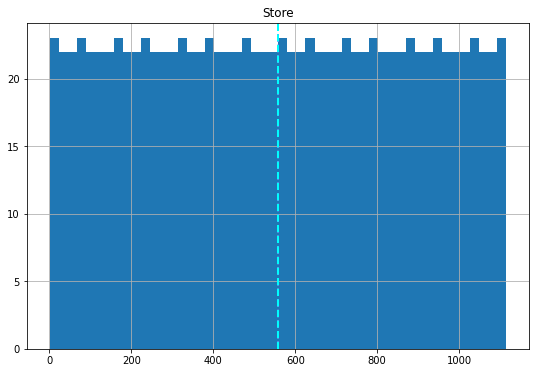

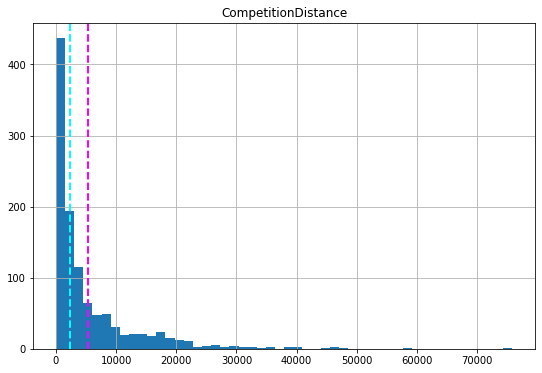

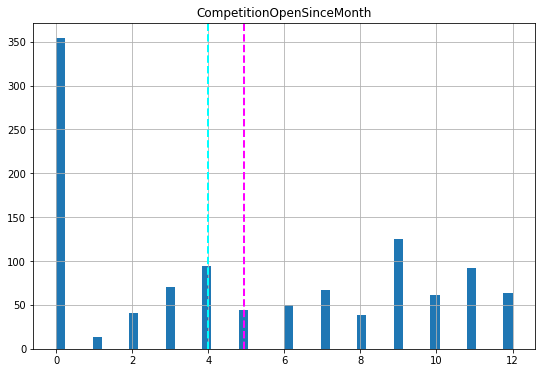

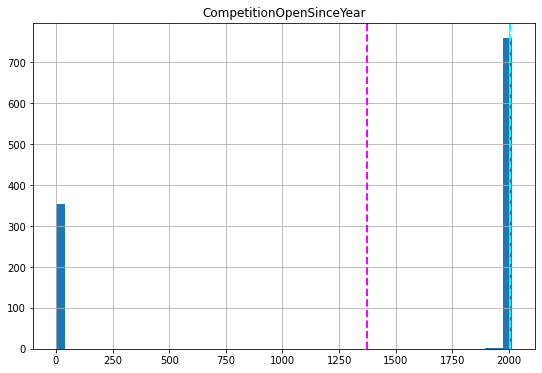

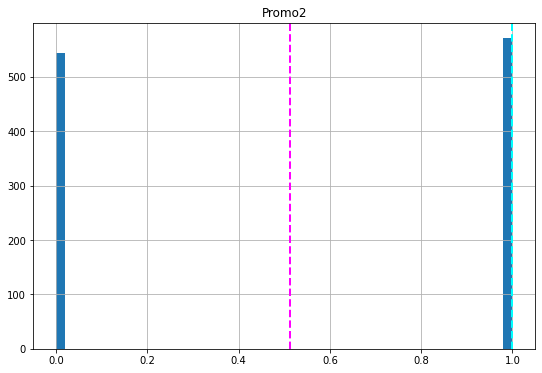

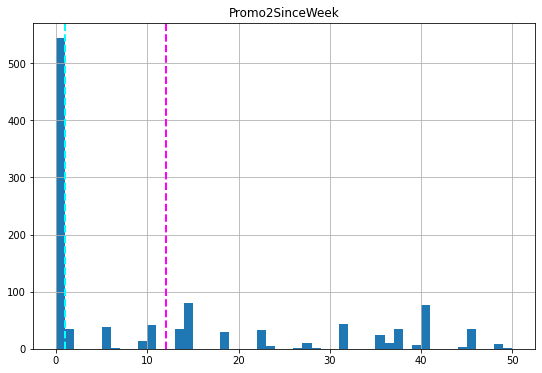

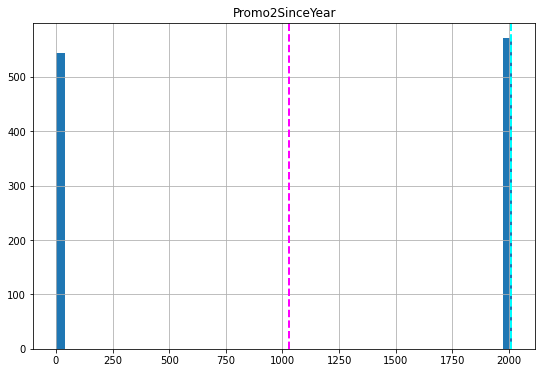

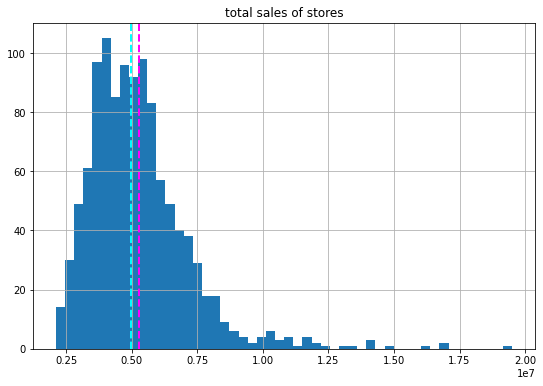

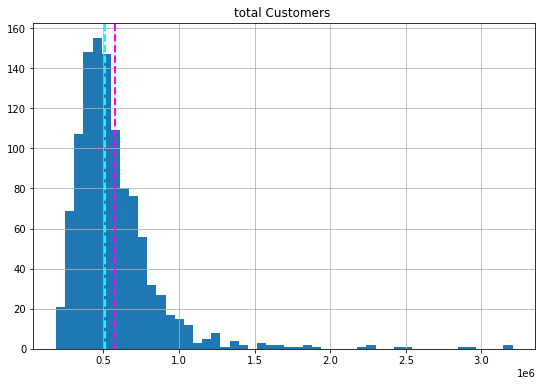

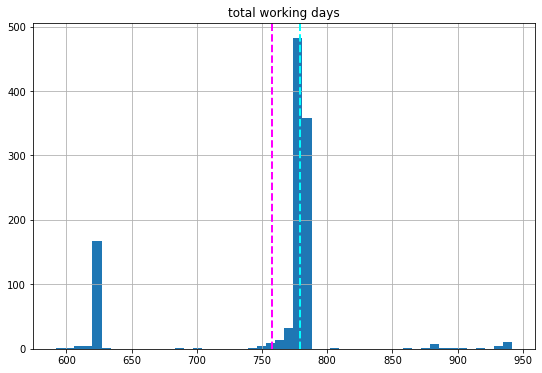

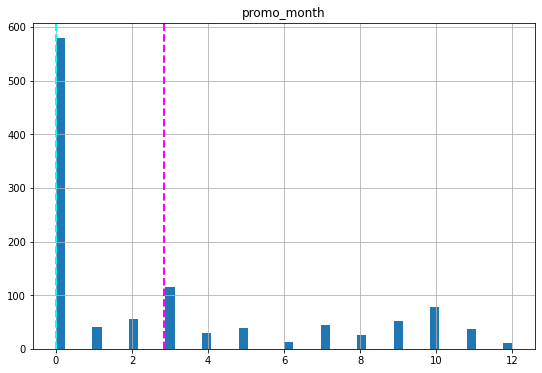

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

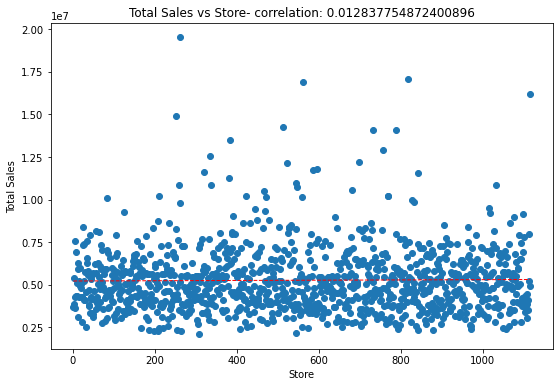

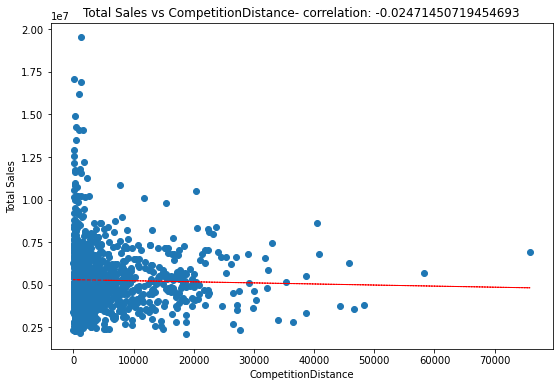

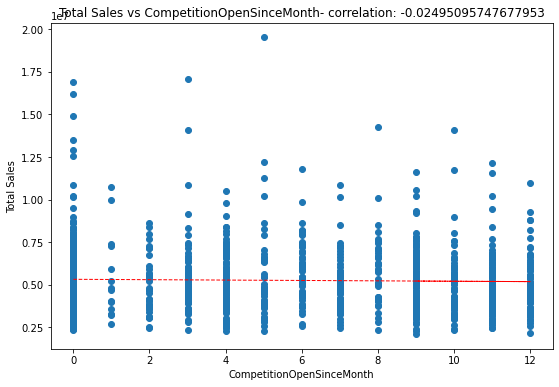

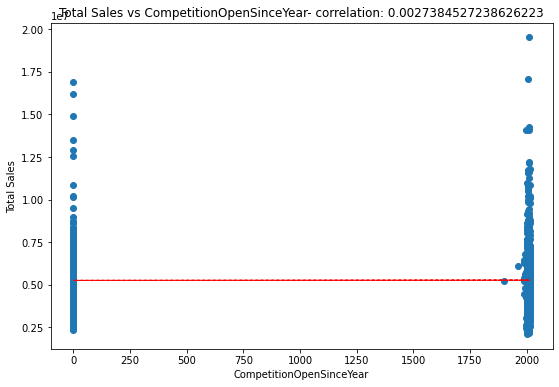

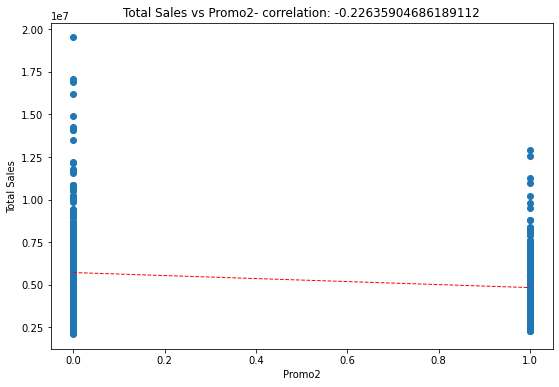

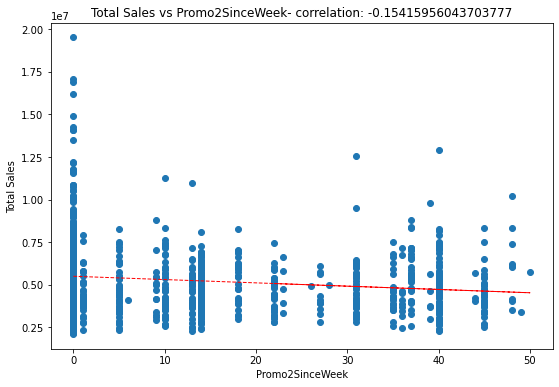

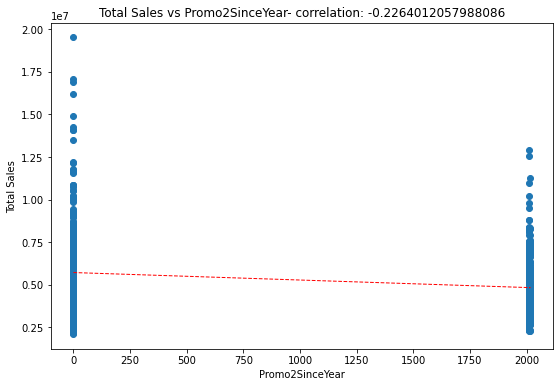

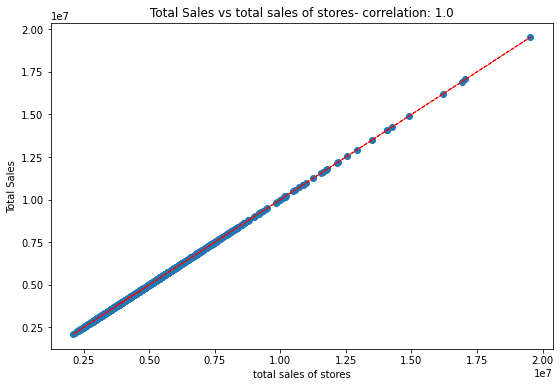

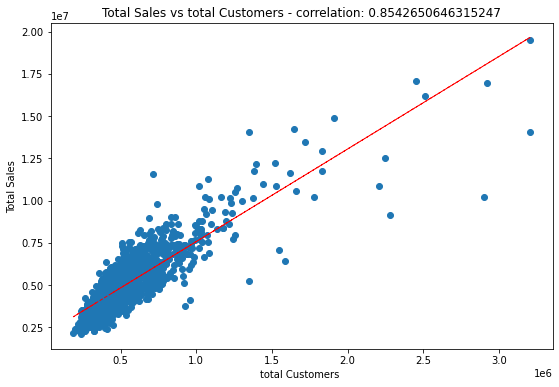

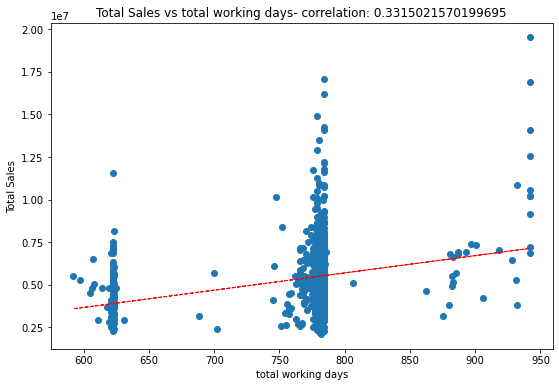

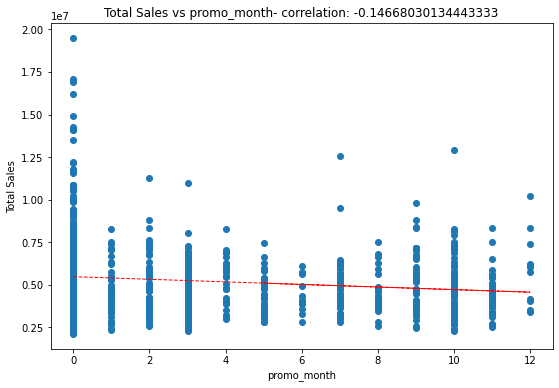

In [ ]:
for col in list(numeric_features[:]):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    features = df[col]
    label = df['total sales of stores']
    correlation = features.corr(label)
    plt.scatter(x=features, y=label)
    plt.xlabel(col)
    plt.ylabel('Total Sales')
    ax.set_title('Total Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['total sales of stores'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,total sales of stores,total Customers,total working days,promo_month,Promotime
0,1,0,0,1270.0,9.0,2008.0,0,0.0,0.0,3716854,440523,781,0.0,0.0
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,3883858,457855,784,3.0,2013.0
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,5408261,584310,779,3.0,2014.0
3,4,0,0,620.0,9.0,2009.0,0,0.0,0.0,7556507,1036254,784,0.0,0.0
4,5,0,0,29910.0,4.0,2015.0,0,0.0,0.0,3642818,418588,779,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,4091076,351883,779,7.0,2020.0
1111,1112,0,0,1880.0,4.0,2006.0,0,0.0,0.0,7974294,653276,779,0.0,0.0
1112,1113,0,0,9260.0,0.0,0.0,0,0.0,0.0,5196242,562151,784,0.0,0.0
1113,1114,0,0,870.0,0.0,0.0,0,0.0,0.0,16202585,2509542,784,0.0,0.0


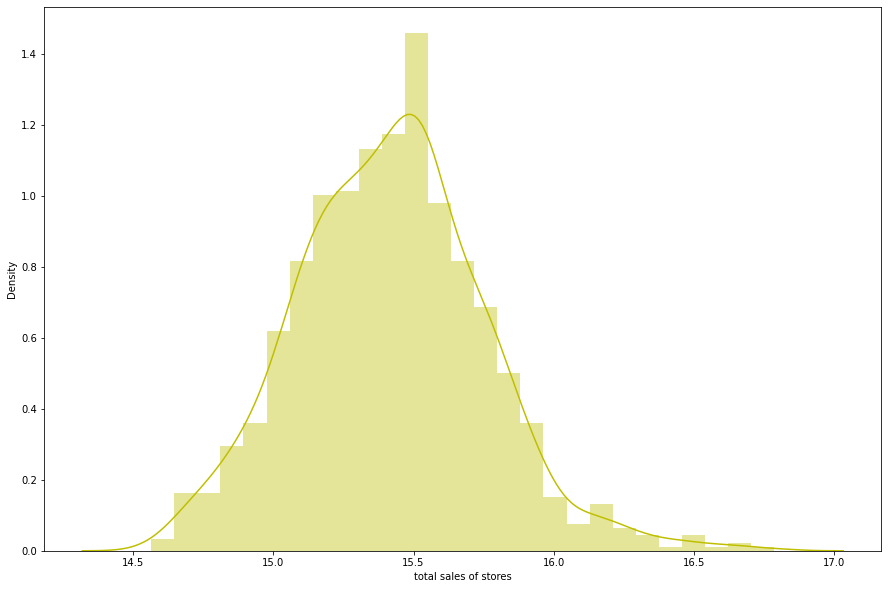

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log(df['total sales of stores']),color="y")
dataset

# Regression

##Preparation

In [ ]:
dataset.shape

(1115, 14)

In [ ]:
dataset.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,total sales of stores,total Customers,total working days,promo_month,Promotime
0,1,0,0,1270.0,9.0,2008.0,0,0.0,0.0,3716854,440523,781,0.0,0.0
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,3883858,457855,784,3.0,2013.0
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,5408261,584310,779,3.0,2014.0
3,4,0,0,620.0,9.0,2009.0,0,0.0,0.0,7556507,1036254,784,0.0,0.0
4,5,0,0,29910.0,4.0,2015.0,0,0.0,0.0,3642818,418588,779,0.0,0.0


In [ ]:
dataset = dataset.drop(['promo_month'],axis=1)

In [ ]:
dataset = dataset.drop(['Promotime'],axis=1)

In [ ]:
dataset.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,total sales of stores,total Customers,total working days
0,1,0,0,1270.0,9.0,2008.0,0,0.0,0.0,3716854,440523,781
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,3883858,457855,784
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,5408261,584310,779
3,4,0,0,620.0,9.0,2009.0,0,0.0,0.0,7556507,1036254,784
4,5,0,0,29910.0,4.0,2015.0,0,0.0,0.0,3642818,418588,779


In [ ]:
y = dataset['total sales of stores']
dataset.drop(['total sales of stores'],axis=1,inplace =True)
features = dataset.columns[1:]

##Implementation

In [ ]:
from scipy.stats import zscore
X = dataset[features[:-1]].apply(zscore)
y = np.log10(y)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(892, 9)
(223, 9)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.6723454730525005

In [ ]:
reg.coef_

array([-3.31886382e-02, -1.64707451e-02,  1.58041333e-02, -4.94012639e-04,
       -2.01885170e-03,  3.41353239e+00,  2.40224751e-03, -3.41525170e+00,
        1.35171107e-01])

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 774485845501.5299
RMSE : 880048.7745014647


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7412679747180588
Adjusted R2 :  0.7303356356216388


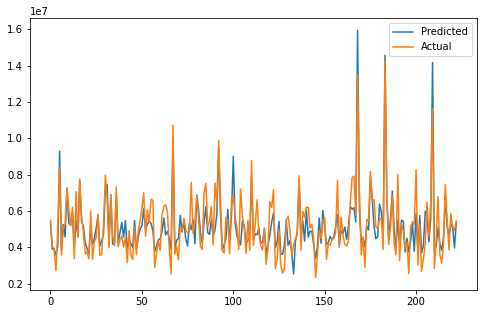

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, y_train)

0.17589614228449146

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2598535156723.014
RMSE : 1611997.2570457477
R2 : 0.13190890734756
Adjusted R2 :  0.09522900202421747


### Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.007486134473891523


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

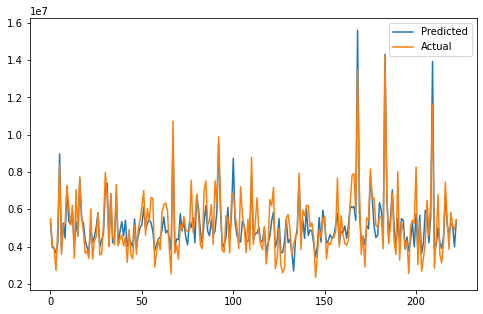

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 772774368649.9
RMSE : 879075.860577402
R2 : 0.7418397267708785
Adjusted R2 :  0.7309315462119015


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.score(X_train, y_train)

0.67162742047712

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 786868199373.3639
RMSE : 887055.9167117729
R2 : 0.7371314091324829
Adjusted R2 :  0.7260242855747006


### Cross Validation

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 30}

Using  {'alpha': 30}  the negative mean squared error is:  -0.007473641350039792


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 766426923708.8777
RMSE : 875458.1221902494
R2 : 0.743960213923091
Adjusted R2 :  0.733141631412799


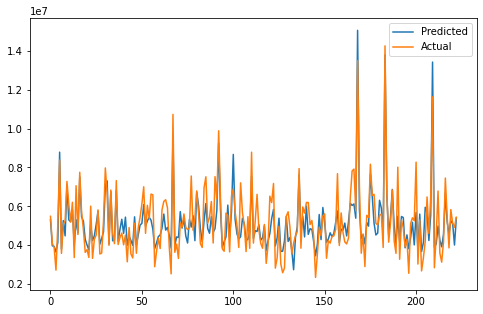

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elasticnet.score(X_train, y_train)

0.47574629696134124

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1639643542491.5808
RMSE : 1280485.6666482373
R2 : 0.4522452579948857
Adjusted R2 :  0.42910069143128937


### Cross Validation

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}

Using  {'alpha': 0.001, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.007726458059789078


In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 774754379550.9117
RMSE : 880201.3289872446
R2 : 0.7411782657080656
Adjusted R2 :  0.7302421360900966


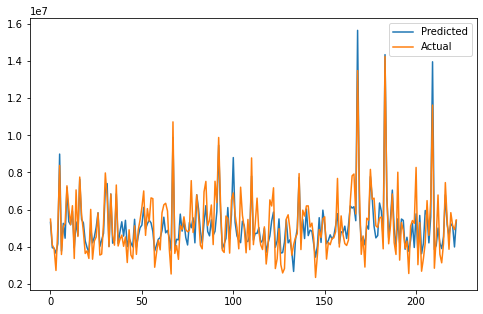

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

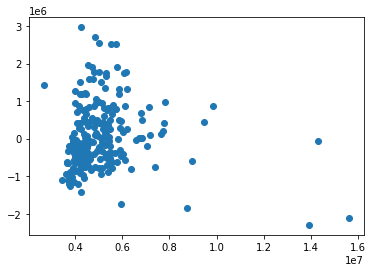

In [ ]:
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso))

In [ ]:
10**(y_pred_lasso)

array([ 5311045.15468049,  3943879.16850612,  3917588.9201049 ,
        3650498.38701313,  4159555.01595989,  8964459.51591206,
        3764925.64288999,  5260291.52455662,  4449504.52977523,
        7188671.40734445,  5346749.52885208,  5170849.3293102 ,
        5918866.32871339,  3943148.34708924,  5322006.70016827,
        4612848.25800864,  7630501.79699773,  5462430.30927791,
        5276593.69288228,  4307308.35935056,  3960416.23023125,
        3692948.62646763,  5026508.48544096,  4205501.01096334,
        4521978.11360911,  5055111.11997457,  5820214.26563967,
        4004057.19807339,  4359077.34977374,  4714787.4458538 ,
        7131935.05235286,  7396989.5080618 ,  4018538.75057584,
        6828520.25430794,  4193299.22125607,  4324300.62020141,
        6835005.69192234,  4162355.14905369,  4797379.36234362,
        5333881.52687804,  4574757.29063484,  5411076.11407808,
        4001805.38259255,  4473226.22442083,  4210355.70132537,
        3996292.42663258,  5479351.22125

In [ ]:
10**(y_test)

1006    5485024.0
1110    4091076.0
187     3884836.0
896     2717511.0
413     5020250.0
          ...    
482     3859771.0
879     5832985.0
691     5132377.0
1114    4922229.0
820     5438993.0
Name: total sales of stores, Length: 223, dtype: float64